In [1]:
#importing dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Training and Testing data

In [2]:

#Training data
X_train = pd.read_csv("Dataset/Train/X_train.txt", sep = " ", header = None)
y_train = pd.read_csv("Dataset/Train/y_train.txt", sep = " ", header = None)

#Testing data
X_test = pd.read_csv("Dataset/Test/X_test.txt", sep = " ", header = None)
y_test = pd.read_csv("Dataset/Test/y_test.txt", sep = " ", header = None)

#activity labels
y_labels = pd.read_csv("Dataset/activity_labels.txt", header = None)

#feature labels
features = pd.read_csv("Dataset/features.txt", header = None)

In [3]:
X_train.shape

(7767, 561)

In [25]:
X_test.shape

(3162, 561)

In [27]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080


In [29]:
y_train.head()

,0
0,5
1,5
2,5
3,5
4,5


## Actual Raw data from 30 different phones

In [5]:
# #User 01 accelerometer and gyroscope data

# acc_user01 = pd.read_csv("Dataset/RawData/acc_exp01_user01.txt", sep = " ", header = None)
# gyro_user01 = pd.read_csv("Dataset/RawData/gyro_exp01_user01.txt", sep = " ", header = None)

# acc_user01.shape


In [6]:
# gyro_user01.shape


## Multiple linear regression

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Fitting the model to the training data
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#Calculating the scores for the training and testing data
print (f"Training R2 Score: {model.score(X_train, y_train)}")
print (f"Testing R2 Score: {model.score(X_test, y_test)}")

Training R2 Score: 0.9412074224369079
Testing R2 Score: 0.8994273427877546


In [22]:
y_test.head()

,0
0,5
1,5
2,5
3,5
4,5


In [24]:
predictions = model.predict(X_test)
predictions[:5]

array([[5.77077614],
       [4.61877565],
       [4.55831322],
       [4.9585298 ],
       [5.10304631]])

Text(0.5, 1.0, 'Residual Plot')

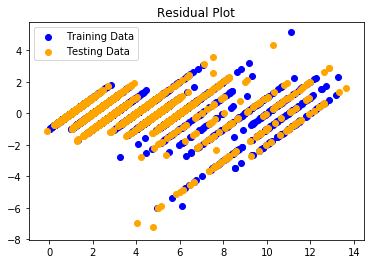

In [10]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.title("Residual Plot")

#### Apparently it doesn't work with categorical labels. so this is not the model we're looking for.

## Support Vector Machine

In [11]:
#Scaling the training data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [12]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
from tensorflow.keras.utils import to_categorical
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)


KNN, RFF (confusion matrix, precision recall)